# **Import Library**

Kode di bawah terdiri dari serangkaian pernyataan import yang membawa library dan modul spesifik untuk manipulasi data, visualisasi, dan machine learning. Dokumentasi :

- import pandas as pd: Mengimpor pustaka pandas untuk manipulasi dan analisis data, dengan alias pd.

- pd.set_option('display.max_columns', None): Mengatur agar semua kolom DataFrame ditampilkan saat dicetak, tidak terpotong.

- import numpy as np: Mengimpor pustaka numpy untuk perhitungan numerik dan operasi array, dengan alias np.

- from collections import Counter: Mengimpor fungsi Counter untuk menghitung frekuensi elemen dalam list atau iterable lainnya.

- import ast: Mengimpor modul ast untuk memproses dan mengevaluasi string Python sebagai objek Python asli, misalnya mengubah string daftar menjadi list.

- import matplotlib.pyplot as plt: Mengimpor matplotlib.pyplot sebagai plt untuk membuat visualisasi seperti grafik dan histogram.

- import seaborn as sns: Mengimpor seaborn sebagai sns, pustaka visualisasi yang dibangun di atas matplotlib dan lebih ramah statistik.

- from sklearn.compose import ColumnTransformer: Mengimpor ColumnTransformer dari scikit-learn untuk menerapkan transformasi berbeda pada kolom DataFrame.

- from sklearn.impute import SimpleImputer: Mengimpor SimpleImputer untuk mengisi nilai yang hilang (NaN) dengan strategi tertentu (seperti mean atau median).

- from sklearn.feature_extraction.text import TfidfVectorizer: Mengimpor TfidfVectorizer untuk mengubah data teks menjadi fitur numerik berbasis TF-IDF.

- from sklearn.metrics.pairwise import cosine_similarity: Mengimpor fungsi cosine_similarity untuk menghitung kemiripan antar vektor (biasanya vektor teks).

In [1]:
# Import library manipulasi data dan numerik
import pandas as pd
import numpy as np
from collections import Counter
import ast

# Pengaturan tampilan DataFrame
pd.set_option('display.max_columns', None)

# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library preprocessing dan ekstraksi fitur
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import fungsi untuk menghitung kemiripan antar vektor
from sklearn.metrics.pairwise import cosine_similarity


# **Upload Data dari Kaggle**

Kode pada bagian ini adalah serangkaian perintah yang digunakan di lingkungan Google Colab untuk mengunggah file kredensial Kaggle, mengunduh dataset dari Kaggle, mengekstrak file dataset, dan memuat serta menampilkan informasi dasar tentang dataset tersebut.

- from google.colab import files = Mengimpor modul files dari Google Colab untuk mengunggah file dari perangkat lokal

- files.upload() = Membuka dialog untuk mengunggah file, seperti kaggle.json untuk autentikasi Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadrozagi","key":"ff1d96f1b4b5d6189a62f31ffb41c5ed"}'}

- mkdir -p ~/.kaggle = Membuat direktori .kaggle di sistem jika belum ada

- !cp kaggle.json ~/.kaggle/ = Menyalin file kaggle.json ke direktori .kaggle untuk autentikasi

- !chmod 600 ~/.kaggle/kaggle.json = Mengatur izin file kaggle.json agar hanya dapat diakses pemilik untuk keamanan

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Perintah !kaggle datasets download -d harits/anime-database-2022 digunakan untuk mengunduh dataset dari Kaggle bernama "anime-database-2022"

In [4]:
!kaggle datasets download -d harits/anime-database-2022

Dataset URL: https://www.kaggle.com/datasets/harits/anime-database-2022
License(s): CC0-1.0
  0% 0.00/5.31M [00:00<?, ?B/s]
100% 5.31M/5.31M [00:00<00:00, 929MB/s]


Perintah !unzip -q anime-database-2022.zip -d dataset digunakan untuk mengekstrak file ZIP bernama anime-database-2022.zip ke dalam folder bernama dataset.

In [5]:
!unzip -q anime-database-2022.zip -d dataset

Kode dibawh digunakan untuk membaca file CSV bernama Anime.csv yang berada di folder /content/dataset/, lalu memasukkannya ke dalam sebuah DataFrame bernama df menggunakan pustaka pandas. DataFrame ini akan digunakan untuk analisis dan manipulasi data selanjutnya.

In [6]:
df = pd.read_csv('/content/dataset/Anime.csv')

# **Data Understanding**

Menampilkan informasi struktur DataFrame seperti jumlah baris, kolom, tipe data, dan nilai yang hilang

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

Menampilkan DataFrame

In [8]:
df.head(3)

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,End_Aired,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013","Sep 29, 2013",Spring 2013,Sundays at 0158 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006","Jun 27, 2007",Fall 2006,Wednesdays at 0056 (JST),"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009","Jul 4, 2010",Spring 2009,Sundays at 1700 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772


Perintah df.describe() digunakan untuk menampilkan statistik deskriptif dari kolom-kolom numerik dalam DataFrame df

In [9]:
df.describe()

,ID,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,21460.000000,20913.000000,20861.000000,14562.000000,14562.000000,19536.000000,21460.000000,2.146000e+04,21460.000000
mean,26458.575582,13.272892,23.934135,6.421724,26507.173809,97795.212019,10743.103681,3.926596e+04,462.214865
std,17100.477121,48.792326,24.676538,0.910469,84989.501599,56485.384273,6204.685188,1.566359e+05,4411.931536
min,1.000000,1.000000,1.000000,1.841000,101.000000,12.000000,1.000000,6.000000e+00,0.000000
25%,8454.750000,1.000000,5.000000,5.791000,418.000000,48879.500000,5369.750000,2.910000e+02,0.000000
50%,31004.500000,2.000000,22.000000,6.431000,1876.500000,97777.000000,10741.500000,1.582500e+03,2.000000
75%,40495.250000,12.000000,26.000000,7.081000,11406.500000,146714.500000,16119.250000,1.158550e+04,23.000000
max,53094.000000,3057.000000,168.000000,9.131000,997243.000000,195632.000000,21490.000000,3.524109e+06,207772.000000


Kode ini mem-parsing string genre dari kolom Genres pada DataFrame dengan memisahkannya berdasarkan koma dan menghapus spasi. Daftar genre dari semua baris diratakan menjadi satu list. Selanjutnya, kode menghitung frekuensi kemunculan setiap genre menggunakan Counter dan memvisualisasikan 10 genre paling umum dalam bentuk bar chart horizontal.

<ipython-input-10-125fd696d01f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='viridis')


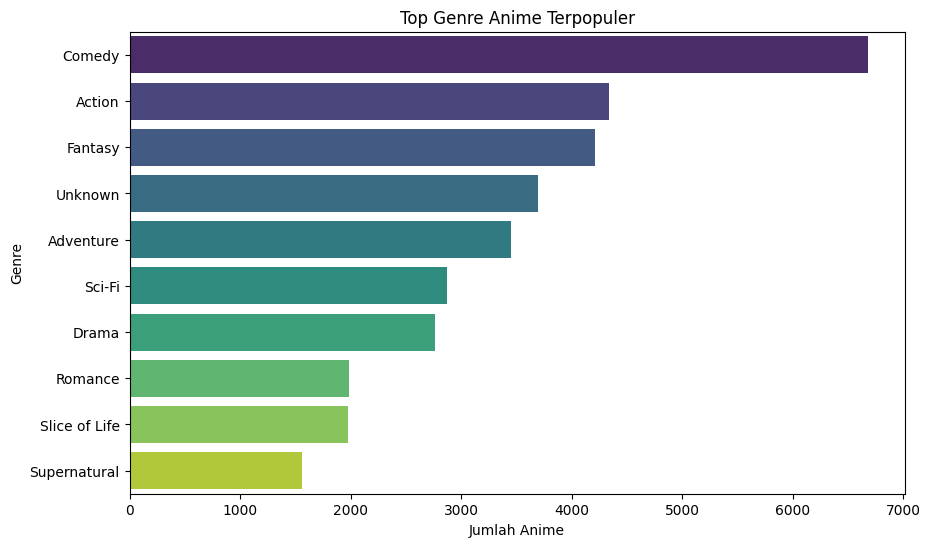

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Function to parse genre strings by splitting and stripping
def parse_genre_string(genre_str):
    if isinstance(genre_str, str):
        # Split by comma, strip whitespace, and filter out empty strings
        return [genre.strip() for genre in genre_str.split(',') if genre.strip()]
    return []

# Apply the parsing function and flatten the list of lists directly
# We are not creating a new column in the dataframe here
all_genres = [genre for genre_str in df['Genres'].dropna() for genre in parse_genre_string(genre_str)]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Get the top 10 genres (or fewer if less than 10 unique genres)
top_genres = genre_counts.most_common(10)

if top_genres: # Check if top_genres is not empty
    genres, counts = zip(*top_genres)

    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(genres), palette='viridis')
    plt.title('Top Genre Anime Terpopuler')
    plt.xlabel('Jumlah Anime')
    plt.ylabel('Genre')
    plt.show()
else:
    print("Tidak ada data genre yang ditemukan untuk divisualisasikan.")

# **Data Preparation**

Kode ini digunakan untuk menghapus kolom-kolom yang tidak diperlukan dari DataFrame, seperti judul anime secara umum (Title, Synonyms, Japanese), tanggal tayang (Start_Aired, End_Aired), sumber adaptasi, serta metrik popularitas lainnya. Tujuannya adalah untuk menyederhanakan dataset agar hanya menyisakan fitur-fitur yang relevan untuk proses analisis dan pemodelan sistem rekomendasi. Dalam konteks ini, kolom Title dihapus karena sistem hanya akan menggunakan kolom English sebagai acuan judul yang ditampilkan kepada pengguna, sehingga informasi judul dalam format lain dianggap tidak diperlukan.

In [11]:
# Ambil hanya kolom yang dibutuhkan
df.drop(['Title', 'Synonyms', 'Japanese','Start_Aired', 'End_Aired','Broadcast','Licensors','Source','Themes','Duration_Minutes',
         'Scored_Users', 'Ranked','Members', 'Favorites','Popularity'],axis=1,inplace=True)
df.head(5)

,ID,English,Synopsis,Type,Episodes,Status,Premiered,Producers,Studios,Genres,Demographics,Rating,Score
0,16498,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,Spring 2013,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,"Action, Drama",Shounen,R - 17+ (violence & profanity),8.531
1,1535,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,Fall 2006,"VAP, Konami, Ashi Productions, Nippon Televisi...",Madhouse,"Supernatural, Suspense",Shounen,R - 17+ (violence & profanity),8.621
2,5114,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Adventure, Drama, Fantasy",Shounen,R - 17+ (violence & profanity),9.131
3,30276,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,Fall 2015,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",Madhouse,"Action, Comedy",Seinen,R - 17+ (violence & profanity),8.511
4,11757,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,Summer 2012,"Aniplex, Genco, DAX Production, ASCII Media Wo...",A-1 Pictures,"Action, Adventure, Fantasy, Romance",Unknown,PG-13 - Teens 13 or older,7.201


Kode ini menghitung jumlah nilai null di setiap kolom DataFrame df menggunakan metode isnull().sum().

In [12]:
df.isnull().sum()

,0
ID,0
English,0
Synopsis,0
Type,0
Episodes,547
Status,0
Premiered,0
Producers,0
Studios,0
Genres,0


Kode ini menggunakan ColumnTransformer untuk menerapkan SimpleImputer dengan strategi median pada kolom Episodes dan Score, yang sering mengandung nilai kosong (null). Pendekatan ini menggantikan nilai-nilai kosong dengan nilai tengah (median) dari masing-masing kolom tersebut, yang lebih tahan terhadap outlier dibanding rata-rata. Sementara itu, kolom lainnya (ID, English, Synopsis, dll.) diteruskan tanpa perubahan melalui parameter remainder='passthrough'. Hasil transformasi dikonversi kembali menjadi sebuah DataFrame baru dengan urutan kolom yang sesuai.

In [13]:
ct=ColumnTransformer(transformers=[("tf1",SimpleImputer(strategy='median'),['Episodes','Score'])],remainder='passthrough')
df=pd.DataFrame(ct.fit_transform(df),columns=['Episodes','Score','ID', 'English', 'Synopsis', 'Type',  'Status', 'Premiered',
       'Producers', 'Studios', 'Genres', 'Demographics', 'Rating'
       ],)
df.head(3)

,Episodes,Score,ID,English,Synopsis,Type,Status,Premiered,Producers,Studios,Genres,Demographics,Rating
0,25.0,8.531,16498,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,Finished Airing,Spring 2013,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,"Action, Drama",Shounen,R - 17+ (violence & profanity)
1,37.0,8.621,1535,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,Finished Airing,Fall 2006,"VAP, Konami, Ashi Productions, Nippon Televisi...",Madhouse,"Supernatural, Suspense",Shounen,R - 17+ (violence & profanity)
2,64.0,9.131,5114,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,Finished Airing,Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Adventure, Drama, Fantasy",Shounen,R - 17+ (violence & profanity)


Kode ini mengisi nilai kosong pada kolom Rating dengan modus atau nilai yang paling sering muncul. Pendekatan ini umum digunakan untuk data kategorikal agar tetap konsisten. Dengan inplace=True, perubahan langsung diterapkan ke DataFrame tanpa membuat salinan baru.

In [14]:
# Rating - isi dengan modus
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

<ipython-input-14-8e926d203358>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)


Kode df.isna().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values atau NaN) di setiap kolom dalam DataFrame df. Hasilnya akan menunjukkan jumlah NaN per kolom, sehingga memudahkan identifikasi kolom mana yang masih memiliki data kosong dan perlu ditangani.

In [15]:
df.isna().sum()

,0
Episodes,0
Score,0
ID,0
English,0
Synopsis,0
Type,0
Status,0
Premiered,0
Producers,0
Studios,0


In [16]:
df.shape


(21460, 13)

Kode df.columns digunakan untuk menampilkan daftar semua nama kolom yang ada dalam DataFrame df. Disini bisa dillihat column apa saja yang tersedia setelah tadi beberapa column didrop

In [17]:
df.columns

Index(['Episodes', 'Score', 'ID', 'English', 'Synopsis', 'Type', 'Status',
       'Premiered', 'Producers', 'Studios', 'Genres', 'Demographics',
       'Rating'],
      dtype='object')

Kode ini mengubah kolom Episodes, Score, dan Rating menjadi string, lalu mendefinisikan beberapa fungsi pemrosesan teks. Masing-masing fungsi memisahkan string berdasarkan spasi atau koma dan mengubahnya menjadi list, bertujuan untuk mempersiapkan data teks agar bisa diolah lebih lanjut

In [18]:
df['Episodes']=df['Episodes'].astype(str)
df['Score']=df['Score'].astype(str)
df['Rating']=df['Rating'].astype(str)
df['Demographics']=df['Demographics'].tolist()
def c(x):
    l=[]
    for i in x.split(' '):
        l.append(f"{i}")
    return l
def ch(x):
    l=[]
    for i in x.split(' '):
        l.append(f"{i}")
    return l
def pri(x):
    l=[]
    for i in x.split(' '):
        l.append(f" {i} ")
    return l
def tpe(x):
    l=[]
    for i in x.split(' '):
        l.append(f" {i}")
    return l
def st(x):
    l=[]
    for i in x.split(' '):
        l.append(f" {i}")
    return l
def de(x):
    l=[]
    for i in x.split(' '):
        l.append(f" {i}")
    return l
def std(x):
    l=[]
    for i in x.split(','):
        l.append(f"{i}")
    return l
def gen(x):
    l=[]
    for i in x.split(','):
        l.append(f" {i}")

    return l
def rat(x):
    l=[]
    for i in x.split(','):
        l.append(f" {i}")
    return l
def prod(x):
    l=[]
    for i in x.split(','):
        l.append(i)
    return l
def change(x):
    l=[]
    for i in x.split(','):
        l.append(i)
    return l

Kode ini menerapkan fungsi pemrosesan teks pada berbagai kolom dalam DataFrame. Setiap kolom diubah dari string menjadi list kata/frasa dengan memisahkan berdasarkan spasi atau koma. Tujuannya adalah untuk menyiapkan data dalam format list agar dapat digunakan untuk pemodelan berbasis teks yaitu TF-IDF atau content-based filtering.



In [19]:
df['Synopsis']=df['Synopsis'].apply(change)
df['Type']=df['Type'].apply(tpe)
df['Status']=df['Status'].apply(st)
df['Premiered']=df['Premiered'].apply(pri)
df['Studios']=df['Studios'].apply(std)
df['Genres']=df['Genres'].apply(gen)
df['Rating']=df['Rating'].apply(rat).tolist()
df['Producers']=df['Producers'].apply(prod)
df['Demographics']=df['Demographics'].apply(de)
df['Episodes']=df['Episodes'].apply(ch)
df['Score']=df['Score'].apply(c)

Kode ini memotong isi kolom Synopsis agar hanya menyimpan tiga elemen pertama dari setiap baris. Begitu juga, kolom Producers dipotong agar hanya menyimpan dua elemen pertama. Tujuannya adalah mereduksi informasi yang terlalu panjang agar tetap relevan dan efisien untuk proses rekomendasi.

In [20]:
df['Synopsis']=df['Synopsis'].apply(lambda x: x[:3])
df['Producers']=df['Producers'].apply(lambda x: x[:2])
df.head(3)

,Episodes,Score,ID,English,Synopsis,Type,Status,Premiered,Producers,Studios,Genres,Demographics,Rating
0,[25.0],[8.531],16498,Attack on Titan,"[Centuries ago, mankind was slaughtered to ne...",[ TV],"[ Finished, Airing]","[ Spring , 2013 ]","[Production I.G, Dentsu]",[Wit Studio],"[ Action, Drama]",[ Shounen],[ R - 17+ (violence & profanity)]
1,[37.0],[8.621],1535,Death Note,"[Brutal murders, petty thefts, and senseless...",[ TV],"[ Finished, Airing]","[ Fall , 2006 ]","[VAP, Konami]",[Madhouse],"[ Supernatural, Suspense]",[ Shounen],[ R - 17+ (violence & profanity)]
2,[64.0],[9.131],5114,Fullmetal Alchemist Brotherhood,[After a horrific alchemy experiment goes wron...,[ TV],"[ Finished, Airing]","[ Spring , 2009 ]","[Aniplex, Square Enix]",[Bones],"[ Action, Adventure, Drama, Fantasy]",[ Shounen],[ R - 17+ (violence & profanity)]


Kode ini membersihkan isi beberapa kolom list dengan menghapus tanda koma , dari Synopsis, dan menghapus spasi " " dari kolom lainnya (Type, Status, Premiered, Studios, Genres, Rating, Producers). Tujuannya adalah untuk normalisasi teks agar konsisten dan siap digunakan dalam analisis atau pemodelan berbasis teks.

In [21]:
df['Synopsis']=df['Synopsis'].apply(lambda x:[i.replace(",",'') for i in x] )
df['Type']=df['Type'].apply(lambda x:[i.replace(" ",'') for i in x] )
df['Status']=df['Status'].apply(lambda x:[i.replace(" ",'') for i in x] )
df['Premiered']=df['Premiered'].apply(lambda x:[i.replace(" ",'') for i in x] )
df['Studios']=df['Studios'].apply(lambda x:[i.replace(" ",'') for i in x] )
df['Genres']=df['Genres'].apply(lambda x:[i.replace(" ",'') for i in x] )
df['Rating']=df['Rating'].apply(lambda x:[i.replace(" ",'') for i in x] )
df['Producers']=df['Producers'].apply(lambda x:[i.replace(" ",'') for i in x] )
df.head(3)

,Episodes,Score,ID,English,Synopsis,Type,Status,Premiered,Producers,Studios,Genres,Demographics,Rating
0,[25.0],[8.531],16498,Attack on Titan,"[Centuries ago, mankind was slaughtered to ne...",[TV],"[Finished, Airing]","[Spring, 2013]","[ProductionI.G, Dentsu]",[WitStudio],"[Action, Drama]",[ Shounen],[R-17+(violence&profanity)]
1,[37.0],[8.621],1535,Death Note,"[Brutal murders, petty thefts, and senseless...",[TV],"[Finished, Airing]","[Fall, 2006]","[VAP, Konami]",[Madhouse],"[Supernatural, Suspense]",[ Shounen],[R-17+(violence&profanity)]
2,[64.0],[9.131],5114,Fullmetal Alchemist Brotherhood,[After a horrific alchemy experiment goes wron...,[TV],"[Finished, Airing]","[Spring, 2009]","[Aniplex, SquareEnix]",[Bones],"[Action, Adventure, Drama, Fantasy]",[ Shounen],[R-17+(violence&profanity)]


Kode ini menggabungkan beberapa kolom teks yang telah dibersihkan (berbentuk list) ke dalam satu kolom baru bernama About. Tujuannya adalah menyatukan informasi penting dari berbagai fitur untuk membentuk representasi konten yang lengkap, yang nantinya akan digunakan dalam content-based recommendation.

In [22]:
df['About']=  df['Synopsis']+df['Genres'] + df['Premiered'] + df['Producers'] + df['Status'] + df['Studios'] + df['Type']+df['Episodes']+df['Score']+df['Demographics']+df['Rating']

Kode ini menghapus kolom-kolom asli yang sudah digabung ke dalam kolom About. Tujuannya adalah merapikan DataFrame dan menghindari duplikasi data karena semua informasi penting kini telah disatukan dalam kolom About.

In [23]:
df.drop(['Synopsis','Type','Status','Premiered','Producers','Studios','Genres','Demographics','Rating','Episodes','Score'],axis=1,inplace=True)

Kode ini mengganti nama kolom English menjadi Title. Tujuannya adalah menyederhanakan nama kolom agar lebih deskriptif dan konsisten dengan konteks sistem rekomendasi, di mana judul anime biasanya disebut Title.



In [24]:
df.rename(columns={'English': 'Title'}, inplace=True)

In [25]:
df

,ID,Title,About
0,16498,Attack on Titan,"[Centuries ago, mankind was slaughtered to ne..."
1,1535,Death Note,"[Brutal murders, petty thefts, and senseless..."
2,5114,Fullmetal Alchemist Brotherhood,[After a horrific alchemy experiment goes wron...
3,30276,One Punch Man,[The seemingly unimpressive Saitama has a rath...
4,11757,Sword Art Online,[Ever since the release of the innovative Nerv...
...,...,...,...
21455,45064,Princess and the Kingdom,"[Unknown, Adventure, Fantasy, Unknown, Unknown..."
21456,45065,Avera and the Mystical Kingdom 2,"[Unknown, Adventure, Fantasy, Unknown, Unknown..."
21457,45059,Brave City,"[Unknown, Adventure, Comedy, Fantasy, Unknown,..."
21458,45063,The Juvenile of King Yu,"[Unknown, Adventure, Fantasy, Unknown, Unknown..."


Kode ini mengubah setiap list dalam kolom About menjadi satu string teks dengan cara menggabungkan elemen-elemennya menggunakan spasi. Ini dilakukan agar data siap diproses oleh algoritma berbasis teks seperti TF-IDF.



In [26]:
df['About']=df['About'].apply(lambda x: " ".join(x))

In [27]:
df.head(1)['About'].values

array(['Centuries ago  mankind was slaughtered to near extinction by monstrous humanoid creatures called Titans  forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival Action Drama Spring 2013 ProductionI.G Dentsu Finished Airing WitStudio TV 25.0 8.531  Shounen R-17+(violence&profanity)'],
      dtype=object)

# **Modeling**

Kode ini menginisialisasi TfidfVectorizer untuk menghitung nilai TF-IDF dari teks di kolom About, yang berisi gabungan informasi sinopsis, genre, studio, dll. Fungsi fit_transform() memproses teks dan mengubahnya menjadi matriks numerik berdasarkan frekuensi kata yang sudah ditimbang dengan IDF. Hasilnya disimpan dalam vectors

In [28]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
vectors = tfidf.fit_transform(df['About']).toarray()

Kode ini berisi array angka yang merepresentasikan bobot TF-IDF dari kata-kata penting (fitur) dalam deskripsi anime pertama (df.iloc[0]['About']). Setiap nilai menunjukkan seberapa penting kata tersebut dalam dokumen tersebut relatif terhadap semua dokumen lainnya.



In [29]:
vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

Kode dibawa ini merupakan untuk menampilkan array 2 dimensi (matrix) di mana setiap baris mewakili satu anime, dan setiap kolom mewakili satu kata penting (fitur) dari seluruh korpus teks. Nilainya adalah bobot TF-IDF untuk kata tersebut dalam deskripsi anime tersebut.

In [30]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Perintah cosine_sim = cosine_similarity(tfidf_matrix) menghitung kemiripan kosinus antar anime berdasarkan matriks TF-IDF yang telah dihitung sebelumnya.

In [31]:
cosine_sim = cosine_similarity(vectors)
cosine_sim

array([[1.        , 0.10418744, 0.09000381, ..., 0.00660362, 0.0068499 ,
        0.0075194 ],
       [0.10418744, 1.        , 0.1296731 , ..., 0.01083563, 0.01123974,
        0.0123383 ],
       [0.09000381, 0.1296731 , 1.        , ..., 0.06549637, 0.06793901,
        0.04424681],
       ...,
       [0.00660362, 0.01083563, 0.06549637, ..., 1.        , 0.96404655,
        0.84221176],
       [0.0068499 , 0.01123974, 0.06793901, ..., 0.96404655, 1.        ,
        0.87362147],
       [0.0075194 , 0.0123383 , 0.04424681, ..., 0.84221176, 0.87362147,
        1.        ]])

Kode ini digunakan untuk mencari 10 anime yang paling mirip dengan anime pertama berdasarkan nilai cosine similarity. Nilai kemiripan ini dihitung dari representasi teks menggunakan TF-IDF. Setelah semua skor kemiripan didapat, data diurutkan dari yang paling mirip, lalu diambil 10 teratas (tanpa menyertakan anime itu sendiri) sebagai rekomendasi.

In [32]:
sorted(list(enumerate(cosine_sim[0])),reverse=True,key=lambda x:x[1])[1:11]

[(11, np.float64(0.28853972178905896)),
 (1641, np.float64(0.2747614655149752)),
 (1255, np.float64(0.2673172178326921)),
 (17, np.float64(0.2671749481325026)),
 (1696, np.float64(0.2608715610208013)),
 (216, np.float64(0.23440279558989333)),
 (1100, np.float64(0.22659684646243305)),
 (2153, np.float64(0.21464341893536243)),
 (10638, np.float64(0.21387100348771404)),
 (1470, np.float64(0.20638171219448154))]

# **Mendapatkan Rekomendasi**

Fungsi anime_recommendations memberikan rekomendasi anime berdasarkan kemiripan genre dengan anime yang diberikan. Fungsi ini mencari k anime teratas yang paling mirip menggunakan matriks kemiripan kosinus, menghapus anime yang dicari, dan mengembalikan informasi tentang anime tersebut beserta genre-nya. Hasilnya adalah daftar anime yang memiliki genre serupa dengan anime input.

In [33]:
def anime_recommendations(input_anime, k=10):
    # Cari index dari anime input
    index = df[df['Title'] == input_anime].index[0]
    # Hitung skor kesamaan dengan semua anime lain
    similarity_scores = list(enumerate(cosine_sim[index]))
    # Urutkan skor dari tertinggi ke terendah (kecuali diri sendiri)
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:k+1]
    # Ambil judul dari hasil urutan
    recommended_titles = [df.iloc[i[0]].Title for i in sorted_scores]
    return recommended_titles


Kode ini digunakan untuk menampilkan 10 rekomendasi anime yang mirip dengan anime Naruto. Pertama, variabel input_anime diisi dengan string 'Naruto' sebagai input judul anime dari pengguna. Kemudian, fungsi anime_recommendations dipanggil dengan argumen k=10, yang berarti sistem akan mengembalikan 10 anime paling mirip berdasarkan skor kesamaan konten. Hasil rekomendasi disimpan dalam variabel recommendations dan ditampilkan.

In [34]:
input_anime ='Naruto'
recommendations = anime_recommendations(input_anime, k=10)
recommendations


['Naruto the Movie 3 Guardians of the Crescent Moon Kingdom',
 'Naruto Shippuden the Movie The Lost Tower',
 'Naruto The Lost Story - Mission Protect the Waterfall Village',
 'Road to Ninja Naruto the Movie',
 'Naruto Shippuden',
 'Naruto Shippuden the Movie 2 -Bonds-',
 'Naruto Shippuden Movie 3 - The Will of Fire',
 'Bleach Thousand-Year Blood War',
 'Boruto Naruto the Movie',
 'Naruto the Movie 1 Ninja Clash in the Land of Snow']

# **Evaluasi**

Kode dibawah digunakan untuk memvisualisasikan distribusi skor cosine similarity antara anime Naruto dan seluruh anime lainnya dalam dataset. Pertama, kode mengambil indeks dari anime Naruto di DataFrame, lalu mengekstrak nilai kemiripan dari matriks cosine_sim. Histogram yang dihasilkan menggambarkan seberapa banyak anime yang memiliki tingkat kemiripan tertentu terhadap Naruto. Dengan 50 bin, grafik ini membantu melihat apakah mayoritas anime memiliki kemiripan rendah atau tinggi terhadap Naruto, yang berguna untuk mengevaluasi sebaran dan efektivitas sistem rekomendasi berbasis konten.

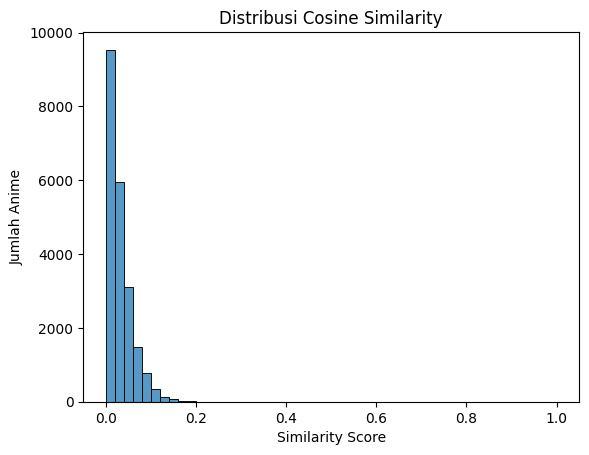

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

input_idx = df[df['Title'] == 'Naruto'].index[0]
similarities = cosine_sim[input_idx]
sns.histplot(similarities, bins=50)
plt.title('Distribusi Cosine Similarity')
plt.xlabel('Similarity Score')
plt.ylabel('Jumlah Anime')
plt.show()
